**Decision Tree Analysis by Aana Kakroo (20BAI1138)**

Import the required python libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

Load the dataset

In [2]:
# load the data and display it
df = pd.read_csv(r"C:\Users\aanak\OneDrive\Desktop\Materials for college\ML\LAB\mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Get information on data in the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the features are categorical and there is no missing value.

Checking for unique values in class column

In [4]:
df['class'].unique()

array(['p', 'e'], dtype=object)

The class column is target and it has two clasification which describes if mushroom is poisonous or edible. In class column posionous is p and edible is e.

In [5]:
#To find number of rows and column
df.shape

(8124, 23)

Visualising count of each unique value in target 'class' column

<AxesSubplot:xlabel='class', ylabel='Count'>

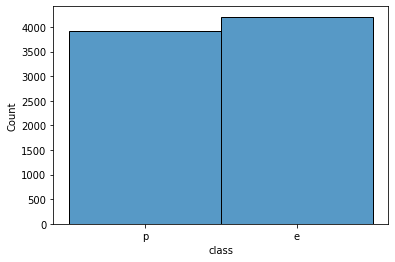

In [6]:
sns.histplot(df['class'])

Separating features and target

In [7]:
#Target is in column class. So X will have all values apart from column class and y will have column class
X = df.drop(['class'],axis=1)
y = df['class']

As all the values in the dataset are categorical. X can be encoded using pandas dummy variable and y using LabelEncoder.

Dummy variable creates a separte column for each unique value of the column, where as LabelEncoder encodes target labels with value between 0 and n_classes-1. LabelEncoder should be used to encode target values, i.e. y, and not the input X.

In [8]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
#import the required python libraries
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


Splitting data for testing and training

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Checking number of rows and columns in testing and training data

In [11]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [12]:
y_train.shape , y_test.shape

((6499,), (1625,))

Creating Decision Tree using Gini index

In [13]:
#import required python libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [14]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3076923076923077, 0.625, 'X[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.15384615384615385, 0.375, 'X[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'X[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8461538461538461, 0.625, 'X[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7692307692307693, 0.375, 'X[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.002\nsamples = 2740\nval

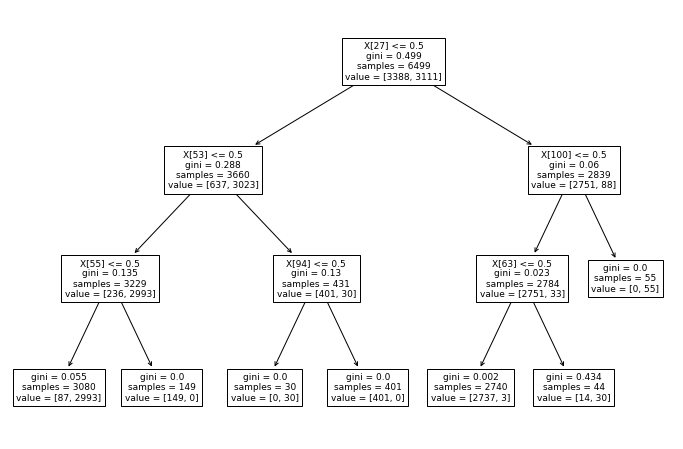

In [15]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [16]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)

In [17]:
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 1, 1])

In [18]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9902
Training-set accuracy score: 0.9840


Creation of Decision Tree using with entropy

In [19]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'X[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3333333333333333, 0.625, 'X[20] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.2222222222222222, 0.375, 'X[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.7777777777777778, 0.625, 'X[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.6666666666666666, 0.375, 'X[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.012\nsamples = 2740\nvalue = [2737, 3]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.902\nsamples = 44\nvalue = [14, 30]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\ns

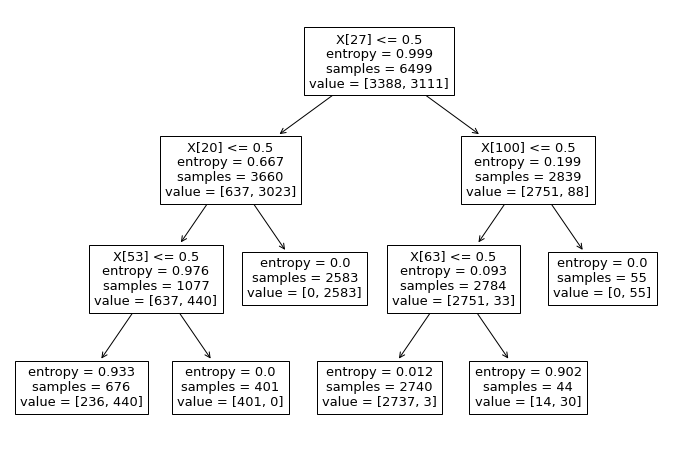

In [20]:
#plot the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [21]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)

In [22]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [23]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9637
Training-set accuracy score: 0.9611


In [24]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9611
Test set score: 0.9637


Confusion Matrix

In [25]:
#import the required python libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [26]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[766  54]
 [  5 800]]


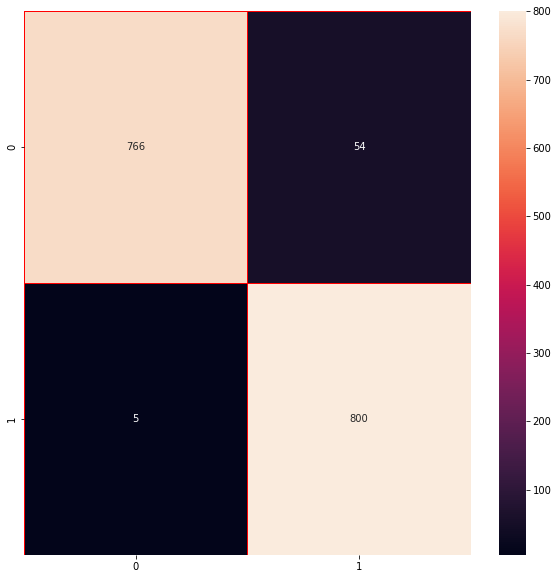

<Figure size 432x288 with 0 Axes>

In [27]:
#heatmap of confusion matrix
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

Classification report (decision tree using entropy)

In [28]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       820
           1       0.94      0.99      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



Getting F1 score

In [29]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.9644364074743822


Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting. Hence, the Decision Tree Classifier is a suitable model for classifying the types of mushrooms as given in dataset and has high accuracy.